In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/MyDrive/8 Aug 2023/"

1-RNN_Hand_writing_recongise.ipynb  4-LSTM_Stock_Predict.ipynb
2-CNN_example.ipynb		    CNN_Example_mnist.ipynb
3A-LSTM_Example_1.ipynb		    Google_Stock_Price_Test.csv
3B-LSTM_stock.ipynb		    Google_Stock_Price_Train.csv


In [ ]:
#dataset_train = pd.read_csv('/content/drive/MyDrive/fintech code/L8-code/Google_Stock_Price_Train.csv')
dataset_train = pd.read_csv('/content/drive/MyDrive/8 Aug 2023/Google_Stock_Price_Train.csv')
#dataset_train = pd.read_csv('http://144.214.222.179/HKU/Google_Stock_Price_Train.csv')

# New Section

In [ ]:
dataset_train.tail()

,Date,Open,High,Low,Close,Volume
1504,22/12/2017,1061.109985,1064.199951,1059.439941,1060.119995,755100
1505,26/12/2017,1058.069946,1060.119995,1050.199951,1056.73999,760600
1506,27/12/2017,1057.390015,1058.369995,1048.050049,1049.369995,1271900
1507,28/12/2017,1051.599976,1054.750000,1044.770020,1048.140015,837100
1508,29/12/2017,1046.719971,1049.699951,1044.900024,1046.400024,887500


In [ ]:
dataset_train.iloc[:, 1: 2]

,Open
0,325.250000
1,331.270000
2,329.830000
3,328.340000
4,322.040000
...,...
1504,1061.109985
1505,1058.069946
1506,1057.390015
1507,1051.599976


In [ ]:
#keras only takes numpy array
training_set = dataset_train.iloc[:, 1: 2].values

In [ ]:
training_set.shape

(1509, 1)

In [ ]:
training_set


array([[ 325.25    ],
       [ 331.27    ],
       [ 329.83    ],
       ...,
       [1057.390015],
       [1051.599976],
       [1046.719971]])

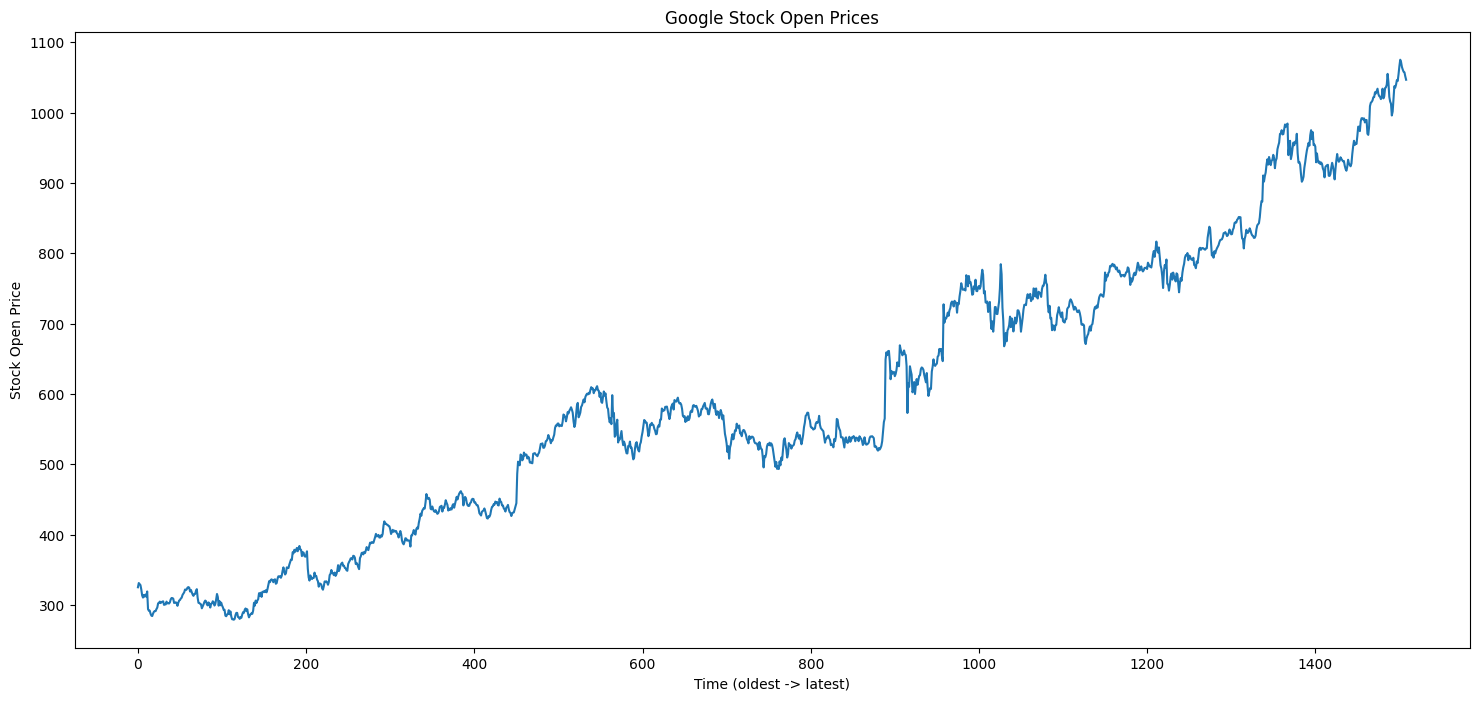

In [ ]:
plt.figure(figsize=(18, 8))
plt.plot(dataset_train['Open'])
plt.title("Google Stock Open Prices")
plt.xlabel("Time (oldest -> latest)")
plt.ylabel("Stock Open Price")
plt.show()

In [ ]:
import os
if os.path.exists('config.py'):
    print(1)
else:
    print(0)

0


In [ ]:
sc = MinMaxScaler(feature_range = (0, 1))
#fit: get min/max of train data
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
training_set_scaled.shape

(1509, 1)

Data structure creation

taking the reference of past 60 days of data to predict the future stock price.
It is observed that taking 60 days of past data gives us best results.

In this data set 60 days of data means 3 months of data.
Every month as 20 days of Stock price.

X train will have data of 60 days prior to our date and y train will have data of one day after our date

In [ ]:
## 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60: i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train.shape

(1449, 60)

In [ ]:
y_train.shape

(1449,)

Data reshaping

In [ ]:
X_train = np.reshape(X_train, newshape =
                     (X_train.shape[0], X_train.shape[1], 1))

1. Number of stock prices - 1449
2. Number of time steps - 60
3. Number of Indicator - 1

In [ ]:
X_train.shape

(1449, 60, 1)

Create mode

In [ ]:
regressor = Sequential()
#add 1st lstm layer
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(rate = 0.2))

##add 2nd lstm layer: 50 neurons
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

##add 3rd lstm layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

##add 4th lstm layer
regressor.add(LSTM(units = 50, return_sequences = False))
regressor.add(Dropout(rate = 0.2))

##add output layer
regressor.add(Dense(units = 1))

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

Model fit

In [ ]:
regressor.fit(x = X_train, y = y_train, batch_size = 32, epochs = 100)

Epoch 1/100
46/46 [==============================] - 16s 127ms/step - loss: 0.0309
Epoch 2/100
46/46 [==============================] - 7s 150ms/step - loss: 0.0036
Epoch 3/100
46/46 [==============================] - 7s 150ms/step - loss: 0.0036
Epoch 4/100
46/46 [==============================] - 6s 128ms/step - loss: 0.0033
Epoch 5/100
46/46 [==============================] - 8s 164ms/step - loss: 0.0033
Epoch 6/100
46/46 [==============================] - 8s 182ms/step - loss: 0.0031
Epoch 7/100
46/46 [==============================] - 7s 153ms/step - loss: 0.0029
Epoch 8/100
46/46 [==============================] - 6s 125ms/step - loss: 0.0026
Epoch 9/100
46/46 [==============================] - 8s 169ms/step - loss: 0.0033
Epoch 10/100
46/46 [==============================] - 6s 128ms/step - loss: 0.0030
Epoch 11/100
46/46 [==============================] - 8s 173ms/step - loss: 0.0027
Epoch 12/100
46/46 [==============================] - 6s 131ms/step - loss: 0.0025
Epoch 13/100

Model evaluation

Read test data

In [ ]:
dataset_test = pd.read_csv('/content/drive/MyDrive/8 Aug 2023/Google_Stock_Price_Test.csv')
#dataset_test = pd.read_csv('http://144.214.222.179/HKU/Google_Stock_Price_Test.csv')

In [ ]:
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,02/01/2018,1048.339966,1066.939941,1045.229980,1065.000000,1237600
1,03/01/2018,1064.310059,1086.290039,1063.209961,1082.479980,1430200
2,04/01/2018,1088.000000,1093.569946,1084.001953,1086.400024,1004600
3,05/01/2018,1094.000000,1104.250000,1092.000000,1102.229980,1279100
4,08/01/2018,1102.229980,1111.270020,1101.619995,1106.939941,1047600


In [ ]:
#keras only takes numpy array
real_stock_price = dataset_test.iloc[:, 1: 2].values
real_stock_price.shape

(125, 1)

In [ ]:
len(dataset_train)

1509

In [ ]:
len(dataset_test)

125

Concat and convert

In [ ]:
#vertical concat use 0, horizontal uses 1
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
##use .values to make numpy array
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

In [ ]:
inputs.shape

(185,)

eshape and scale

In [ ]:
#reshape data to only have 1 col
inputs = inputs.reshape(-1, 1)

#scale input
inputs = sc.transform(inputs)

In [ ]:
inputs

array([[0.84962571],
       [0.86370723],
       [0.88041408],
       [0.88041408],
       [0.87252539],
       [0.88977245],
       [0.89548795],
       [0.89561353],
       [0.89333989],
       [0.89519906],
       [0.88795101],
       [0.89227219],
       [0.89237271],
       [0.86785253],
       [0.86580499],
       [0.88041408],
       [0.91708126],
       [0.92312336],
       [0.92465583],
       [0.92715565],
       [0.93287114],
       [0.93331076],
       [0.94195312],
       [0.93979257],
       [0.94387507],
       [0.94823389],
       [0.93877501],
       [0.93495632],
       [0.93391377],
       [0.92966796],
       [0.93382583],
       [0.94825904],
       [0.93098691],
       [0.93481816],
       [0.94950262],
       [0.95059547],
       [0.9557834 ],
       [0.97473874],
       [0.95914996],
       [0.93363737],
       [0.92538443],
       [0.92144008],
       [0.9004372 ],
       [0.90742142],
       [0.93120043],
       [0.95263043],
       [0.9501307 ],
       [0.955

Create test data strucutre

In [ ]:
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
#add dimension of indicator
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
X_test.shape

(125, 60, 1)

Model prediction

In [ ]:
predicted_stock_price = regressor.predict(X_test)

4/4 [==============================] - 2s 32ms/step


In [ ]:
#inverse the scaled value
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

Result visualization

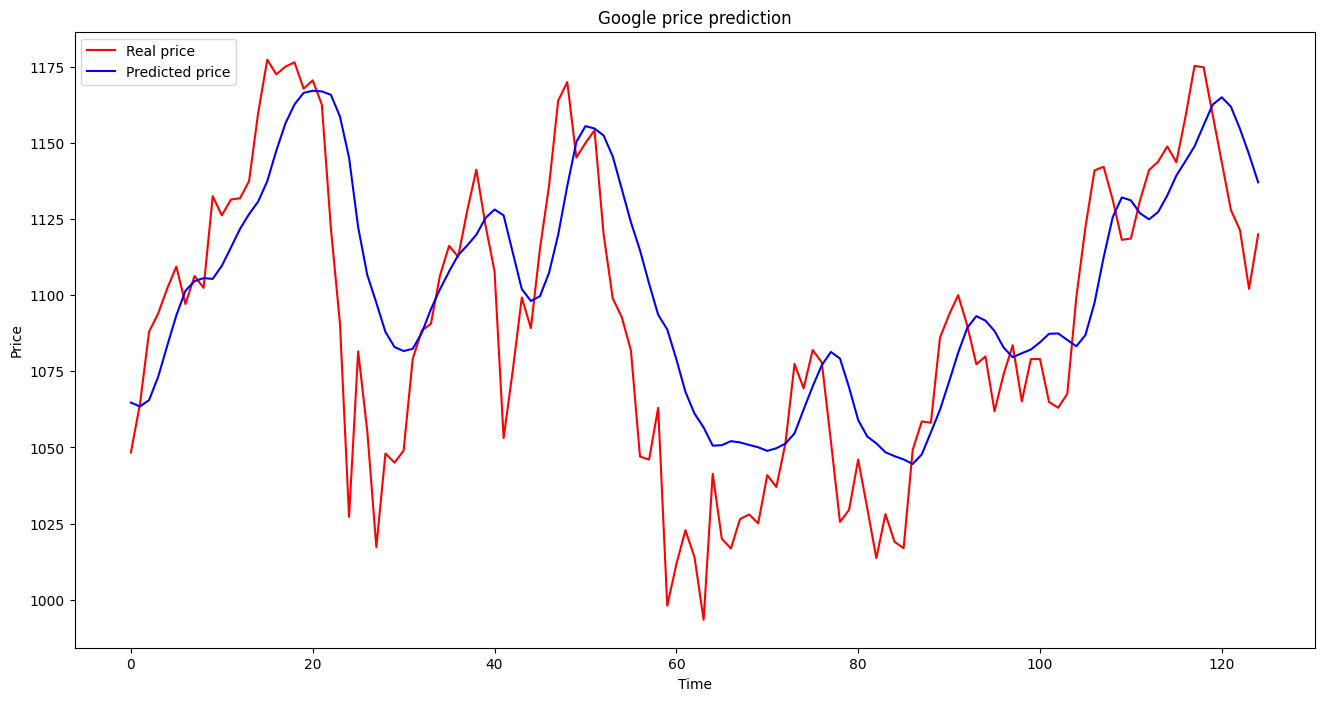

In [ ]:
##visualize the prediction and real price
plt.figure(figsize=(16, 8))
plt.plot(real_stock_price, color = 'red', label = 'Real price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted price')

plt.title('Google price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()